The Nadaraya-Waston kernel-based regression techique is used for smoothing the data point.

In [1]:
import numpy as np
import statsmodels.nonparametric.api as nparam

In [2]:
np.random.seed(500)
nobs = [250, 1000][0]
sig_fac = 1
x = np.random.uniform(-2, 2, size=nobs)
x.sort()
y_true = np.sin(x*5)/x + 2*x
y = y_true + sig_fac * (np.sqrt(np.abs(3+x))) * np.random.normal(size=nobs)

In [3]:
model = nparam.KernelReg(endog=[y],
                         exog=[x],
                         reg_type='lc',
                         var_type='c',
                         bw='cv_ls',
                         defaults=nparam.EstimatorSettings(efficient=True))

sm_bw = model.bw
sm_mean, sm_mfx = model.fit()

In [4]:
model1 = nparam.KernelReg(endog=[y],
                          exog=[x],
                          reg_type='lc',
                          var_type='c',
                          bw='cv_ls')
mean1, mfx1 = model1.fit()

In [5]:
model2 = nparam.KernelReg(endog=[y],
                          exog=[x],
                          reg_type='ll',
                          var_type='c',
                          bw='cv_ls')

mean2, mfx2 = model2.fit()

In [6]:
print(model.bw)
print(model1.bw)
print(model2.bw)

[0.30082959]
[0.1079096]
[0.11641064]


In [8]:
from scipy.interpolate import UnivariateSpline

In [15]:
spl = UnivariateSpline(x, y)

x1 = np.arange(-2, 2, 1000)
spl_mean = spl(x1)

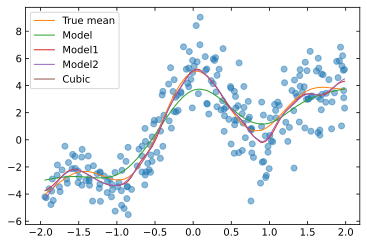

In [16]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format="svg"

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'o', alpha=0.5)
ax.plot(x, y_true, lw=1, label="True mean")
ax.plot(x, sm_mean, lw=1, label="Model")
ax.plot(x, mean1, lw=1, label="Model1")
ax.plot(x, mean2, lw=1, label="Model2")
ax.plot(x1, spl_mean, lw=1, label="Cubic")
ax.legend()

plt.show()